In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Read dataset 

In [2]:
df=pd.read_csv("Complete_Dataset_updated.csv")
pd.options.display.max_columns = None
df.head(10)

,Date,DOY,Sample,Sub-Sample,Lat,Long_,Sample_type,Animals,DM,MM,Biomass,NDF,ADF,CP,TDN_based_ADF,TDN_based_NDF,Satellite_Images_Dates,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,NDWI,EVI,LAI,DVI,GCI,GEMI,SAVI,TEMP_MAX,TEMP_MIN,RAD_SOL,Rainfall,WIND_SPD,EVAPOT,PRES_ATM,HUM_REL,TP_SFC_AVG,Wind_Dir,Dew_Point,Radiative_Dif_AVG,Radiative_Direct_AVG,PPFD,Longwave_Rad_AVG,Environmental Suitability Index
0,7/6/2022,187,1,1,-20.446717,-54.839505,Q1,1,54.177195,6.869019,2943.000000,79.722130,52.504546,4.632363,47.998959,50.537899,7/2/2022,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.209516
1,7/6/2022,187,1,2,-20.446717,-54.839505,Q1,1,54.177058,6.835684,2943.000000,70.663844,46.794328,4.811976,52.447219,54.316111,7/2/2022,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,5.109516
2,7/6/2022,187,2,1,-20.446996,-54.838856,Q4,1,52.260843,5.125652,2855.333333,79.330072,50.323829,4.644871,49.697737,50.701427,7/2/2022,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.506646
3,7/6/2022,187,2,2,-20.446996,-54.838856,Q4,1,52.285797,5.241126,2855.333333,73.021953,49.138437,4.647189,50.621158,53.332543,7/2/2022,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,4.606646
4,7/6/2022,187,3,1,-20.446424,-54.839246,G2,1,49.984466,4.742429,3058.666667,74.705529,53.632386,5.006476,47.120371,52.630324,7/2/2022,1318,1422,1664,1986,2381,2861,3025,3060,3156,3194,3323,2834,0.212842,-0.025776,0.150619,0.426941,1074,0.838942,-1152285.914,0.319231,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.703806
5,7/6/2022,187,3,2,-20.446424,-54.839246,G2,1,50.040418,4.718451,305.866667,74.566726,44.106818,4.908831,54.540788,52.688219,7/2/2022,1318,1422,1664,1986,2381,2861,3025,3060,3156,3194,3323,2834,0.212842,-0.025776,0.150619,0.426941,1074,0.838942,-1152285.914,0.319231,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.103806
6,7/6/2022,187,4,1,-20.446333,-54.838763,G3,1,49.774424,8.110455,2191.000000,71.508097,47.594390,5.873591,51.823970,53.963973,7/2/2022,1314,1451,1672,1983,2391,2897,3041,3083,3147,3184,3344,2833,0.217134,-0.030350,0.154129,0.439639,1100,0.843900,-1208778.786,0.325669,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,4.306081
7,7/6/2022,187,4,2,-20.446333,-54.838763,G3,1,49.572758,7.907331,2191.000000,72.434858,57.470713,5.785925,44.130314,53.577421,7/2/2022,1314,1451,1672,1983,2391,2897,3041,3083,3147,3184,3344,2833,0.217134,-0.030350,0.154129,0.439639,1100,0.843900,-1208778.786,0.325669,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,4.306081
8,7/6/2022,187,5,1,-20.446437,-54.839261,Q2,1,51.658871,4.611986,2953.833333,71.962272,49.879834,4.811649,50.043609,53.774536,7/2/2022,1318,1422,1664,1986,2381,2861,3025,3060,3156,3194,3323,2834,0.212842,-0.025776,0.150619,0.426941,1074,0.838942,-1152285.914,0.319231,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,4

# prepare the data set

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             312 non-null    object 
 1   DOY                              312 non-null    int64  
 2   Sample                           312 non-null    int64  
 3   Sub-Sample                       312 non-null    int64  
 4   Lat                              312 non-null    float64
 5   Long_                            312 non-null    float64
 6   Sample_type                      312 non-null    object 
 7   Animals                          312 non-null    int64  
 8   DM                               312 non-null    float64
 9   MM                               312 non-null    float64
 10  Biomass                          312 non-null    float64
 11  NDF                              312 non-null    float64
 12  ADF                   

In [4]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Convert 'Satellite_Images_Dates' to datetime
df['Satellite_Images_Dates'] = pd.to_datetime(df['Satellite_Images_Dates'], errors='coerce')

df['Satellite_Images_Dates_days'] = df['Satellite_Images_Dates'].dt.day
df['Satellite_Images_Dates_month'] = df['Satellite_Images_Dates'].dt.month
df['Satellite_Images_Dates_Year'] = df['Satellite_Images_Dates'].dt.year


In [5]:
# Encoding:

# df=pd.get_dummies(df,columns=['Sample_type'])


ordinal_encoder = OrdinalEncoder()
df['Sample_type_encoded'] = ordinal_encoder.fit_transform(df[['Sample_type']])

# Use OrdinalEncoder to convert the categorical column 'Sample_type' into numeric values.
# Each unique category is assigned an integer based on alphabetical order or custom logic.



In [6]:
df=pd.get_dummies(df,columns=['Sample_type'])

In [7]:
df.head(10)

,Date,DOY,Sample,Sub-Sample,Lat,Long_,Animals,DM,MM,Biomass,NDF,ADF,CP,TDN_based_ADF,TDN_based_NDF,Satellite_Images_Dates,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,NDWI,EVI,LAI,DVI,GCI,GEMI,SAVI,TEMP_MAX,TEMP_MIN,RAD_SOL,Rainfall,WIND_SPD,EVAPOT,PRES_ATM,HUM_REL,TP_SFC_AVG,Wind_Dir,Dew_Point,Radiative_Dif_AVG,Radiative_Direct_AVG,PPFD,Longwave_Rad_AVG,Environmental Suitability Index,day,month,year,Satellite_Images_Dates_days,Satellite_Images_Dates_month,Satellite_Images_Dates_Year,Sample_type_G1,Sample_type_G2,Sample_type_G3,Sample_type_G4,Sample_type_Q1,Sample_type_Q2,Sample_type_Q3,Sample_type_Q4,Sample_type_S1,Sample_type_S2
0,2022-07-06,187,1,1,-20.446717,-54.839505,1,54.177195,6.869019,2943.000000,79.722130,52.504546,4.632363,47.998959,50.537899,2022-07-02,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.209516,6,7,2022,2,7,2022,False,False,False,False,True,False,False,False,False,False
1,2022-07-06,187,1,2,-20.446717,-54.839505,1,54.177058,6.835684,2943.000000,70.663844,46.794328,4.811976,52.447219,54.316111,2022-07-02,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,5.109516,6,7,2022,2,7,2022,False,False,False,False,True,False,False,False,False,False
2,2022-07-06,187,2,1,-20.446996,-54.838856,1,52.260843,5.125652,2855.333333,79.330072,50.323829,4.644871,49.697737,50.701427,2022-07-02,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.506646,6,7,2022,2,7,2022,False,False,False,False,False,False,False,True,False,False
3,2022-07-06,187,2,2,-20.446996,-54.838856,1,52.285797,5.241126,2855.333333,73.021953,49.138437,4.647189,50.621158,53.332543,2022-07-02,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,4.606646,6,7,2022,2,7,2022,False,False,False,False,False,False,False,True,False,False
4,2022-07-06,187,3,1,-20.446424,-54.839246,1,49.984466,4.742429,3058.666667,74.705529,53.632386,5.006476,47.120371,52.630324,2022-07-02,1318,1422,1664,1986,2381,2861,3025,3060,3156,3194,3323,2834,0.212842,-0.025776,0.150619,0.426941,1074,0.838942,-1152285.914,0.319231,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.703806,6,7,2022,2,7,2022,False,True,False,False,False,False,False,False,False,False
5,2022-07-06,187,3,2,-20.446424,-54.839246,1,50.040418,4.718451,305.866667,74.566726,44.106818,4.908831,54.540788,52.688219,2022-07-02,1318,1422,1664,1986,2381,2861,3025,3060,3156,3194,3323,2834,0.212842,-0.025776,0.150619,0.426941,1074,0.838942,-1152285.914,0.319231,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.103806,6,7,2022,2,7,2022,False,True,False,False,False,False,False,False,False,False
6,2022-07-06,187,4,1,-20.446333,-54.838763,1,49.774424,8.110455,2191.000000,71.508097,47.594390,5.873591,51.823970,53.963973,2022-07-02,1314,1451,1672,1983,2391,2897,3041,3083,3147,3184,3344,2833,0.217134,-0.030350,0.154129,0.439639,1100,0.843900,-1208778.786,0.325669,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,4.306081,6,7,2022,2,7,2022,False,False,True,False,False,False,False,False,False,False
7,2022-07-

# Select features 


## Select K Best

In [8]:
X = df.drop(["Biomass","Date","Satellite_Images_Dates"], axis=1)
# I droped them because I trun them to col that i can use:
# i turned the dates to day, month, year / I encoded the Sample_type to Sample_type_encoded

In [9]:
y=df["Biomass"]

## First i need to find the best K to use


In [10]:
 
results = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

for k in range(1, X_train.shape[1]+1):
    
    selector = SelectKBest(f_regression, k=k)
    selector.fit(X_train, y_train)
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results.append({'k': k, 'MAE': mae, 'MSE': mse, 'R2': r2})

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

pd.options.display.float_format = '{:.2f}'.format

# Find the k with the best R2 score
best_k_r2 = results_df.loc[results_df['R2'].idxmax()]
print( "Best k based on R2:", best_k_r2)



Best k based on R2: k          61.00
MAE      1088.83
MSE   2133590.88
R2          0.81
Name: 60, dtype: float64


The best number of features is Select k best : 61

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
selector = SelectKBest(f_regression, k=61)
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

selected_mask = selector.get_support()
SelectKBest = X_train.columns[selected_mask].tolist()

print("Selected Features:")
print(SelectKBest)

Selected Features:
['DOY', 'Sample', 'Sub-Sample', 'Lat', 'Long_', 'Animals', 'DM', 'MM', 'NDF', 'ADF', 'CP', 'TDN_based_ADF', 'TDN_based_NDF', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'NDVI', 'NDWI', 'EVI', 'LAI', 'DVI', 'GCI', 'GEMI', 'SAVI', 'TEMP_MAX', 'TEMP_MIN', 'RAD_SOL', 'Rainfall', 'WIND_SPD', 'EVAPOT', 'PRES_ATM', 'HUM_REL', 'Wind_Dir', 'Dew_Point', 'Radiative_Dif_AVG', 'Radiative_Direct_AVG', 'PPFD', 'Longwave_Rad_AVG', 'Environmental Suitability Index', 'day', 'month', 'Satellite_Images_Dates_month', 'Sample_type_G1', 'Sample_type_G2', 'Sample_type_G3', 'Sample_type_G4', 'Sample_type_Q1', 'Sample_type_Q2', 'Sample_type_Q3', 'Sample_type_Q4', 'Sample_type_S1', 'Sample_type_S2']


## Recursive feature elimination

In [12]:
results = []

# after 12 it gives me the same result

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

for n_features in range(1,X_train.shape[1]+1):  
    
    model = LinearRegression()
    rfe = RFE(estimator=model, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    
    X_train_selected = rfe.transform(X_train)
    X_test_selected = rfe.transform(X_test)
    
    
    # Train the model
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results.append({'n_features': n_features, 'MAE': mae, 'MSE': mse, 'R2': r2})

# Convert results to a DataFrame for easier visualization
results_df = pd.DataFrame(results)

# Print the best number of features based on R2
best_n_features_r2 = results_df.loc[results_df['R2'].idxmax()]
print("Best n_features based on R2:")
print(best_n_features_r2)

Best n_features based on R2:
n_features        65.00
MAE             1106.16
MSE          2176322.56
R2                 0.80
Name: 64, dtype: float64


The best number of features in RFE : 65

In [13]:
# Assuming `best_n_features_r2['n_features']` contains the best number of features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)
best_RFE_features = int(best_n_features_r2['n_features'])
rfe = RFE(estimator=LinearRegression(), n_features_to_select=65)
rfe.fit(X_train, y_train)
selected_mask = rfe.get_support()
selected_features_RFE = X_train.columns[selected_mask].tolist()
print("Selected Features:")
print(selected_features_RFE)

Selected Features:
['DOY', 'Sample', 'Sub-Sample', 'Lat', 'Long_', 'Animals', 'DM', 'MM', 'NDF', 'ADF', 'CP', 'TDN_based_ADF', 'TDN_based_NDF', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'NDVI', 'NDWI', 'EVI', 'LAI', 'DVI', 'GCI', 'GEMI', 'SAVI', 'TEMP_MAX', 'TEMP_MIN', 'RAD_SOL', 'Rainfall', 'WIND_SPD', 'EVAPOT', 'PRES_ATM', 'HUM_REL', 'TP_SFC_AVG', 'Wind_Dir', 'Dew_Point', 'Radiative_Dif_AVG', 'Radiative_Direct_AVG', 'PPFD', 'Longwave_Rad_AVG', 'Environmental Suitability Index', 'day', 'month', 'year', 'Satellite_Images_Dates_days', 'Satellite_Images_Dates_month', 'Satellite_Images_Dates_Year', 'Sample_type_G1', 'Sample_type_G2', 'Sample_type_G3', 'Sample_type_G4', 'Sample_type_Q1', 'Sample_type_Q2', 'Sample_type_Q3', 'Sample_type_Q4', 'Sample_type_S1', 'Sample_type_S2']


# Forecasting Models

I will use the RFE features because it have R2=0.76 , and use 19 features

## Exponential Smoothing

### find the best alpha:

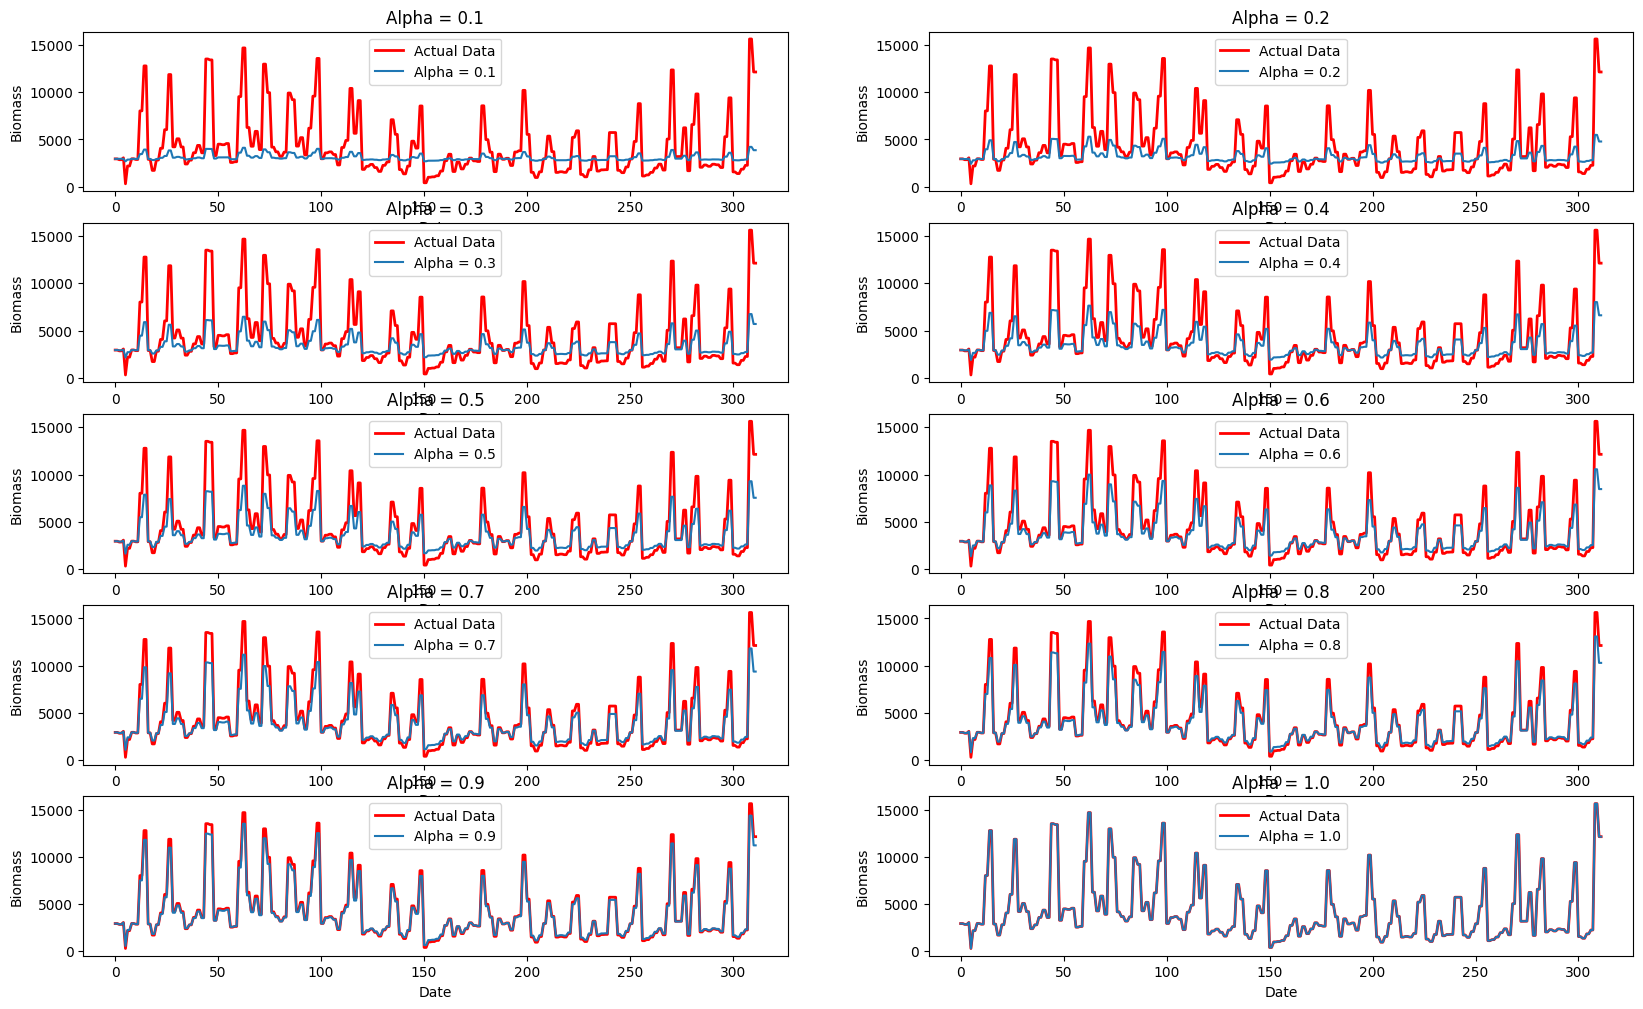

In [14]:
import matplotlib.pyplot as plt
import numpy as np

Biomass = df["Biomass"]

alpha_values = np.linspace(0.1, 1.0, 10) 
forecast = [Biomass[0]]


fig, axes = plt.subplots(len(alpha_values) // 2, 2, figsize=(20, 12)) 
axes = axes.flatten()  

for idx, alpha in enumerate(alpha_values):
    forecast = [Biomass[0]]
    for t in range(1, len(df['Biomass'])):
        forecast.append(forecast[-1] + alpha * (Biomass.iloc[t] - Biomass.iloc[t - 1]))
    
    ax = axes[idx]
    ax.plot(df['Biomass'], label='Actual Data', color='red', linewidth=2)
    ax.plot(forecast, label=f'Alpha = {round(alpha, 2)}', linestyle='-')
    ax.set_title(f'Alpha = {round(alpha, 2)}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Biomass')
    ax.legend()


plt.show()


In [15]:
actual = df['Biomass']  # Actual biomass values
predicted = forecast    # Forecasted biomass values

# Calculating MAE, MSE, and R2
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
r2 = r2_score(actual, predicted)


# Printing the results
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.000000
Mean Squared Error (MSE): 0.000000
R-squared (R2): 1.0


# linear regression


## RFE Features:

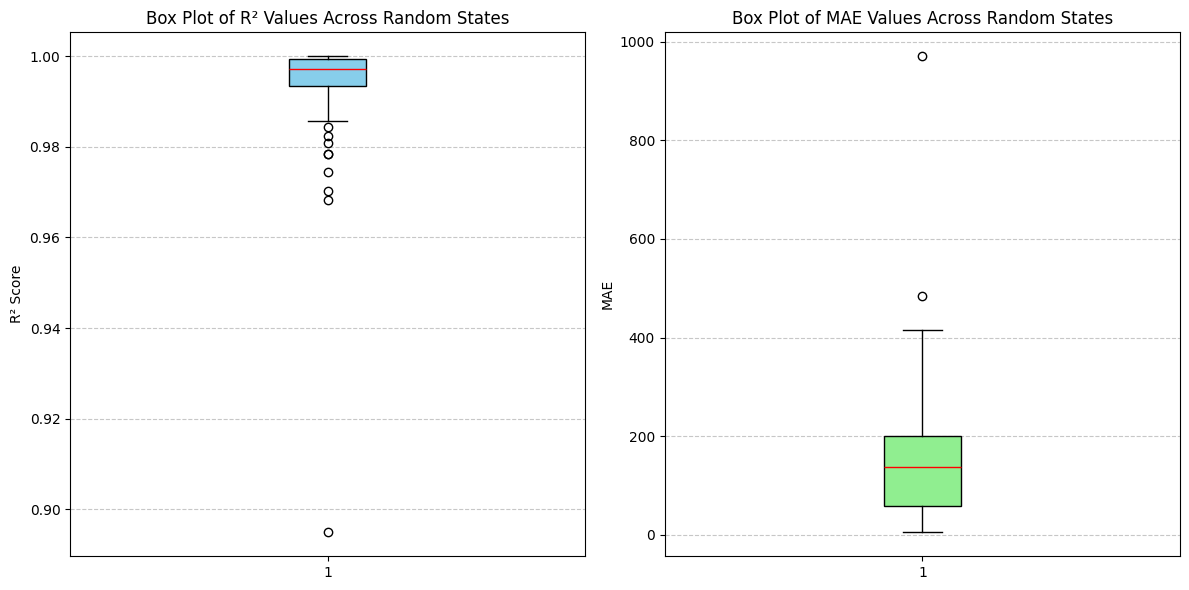

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Initialize lists to store R² and MAE values
r2_values = []
mae_values = []

# Loop to calculate R² and MAE values for different random states
for i in range(1, 100):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features_RFE], y, test_size=0.2, random_state=i)

    # Train the model
    model = LinearRegression()
    model.fit(X_test, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Evaluate the model and store R² and MAE values
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    r2_values.append(r2)
    mae_values.append(mae)

# Create box plots for R² and MAE values
plt.figure(figsize=(12, 6))

# Box plot for R² values
plt.subplot(1, 2, 1)
plt.boxplot(r2_values, patch_artist=True, boxprops=dict(facecolor="skyblue", color="black"),
            whiskerprops=dict(color="black"), capprops=dict(color="black"), medianprops=dict(color="red"))
plt.title('Box Plot of R² Values Across Random States')
plt.ylabel('R² Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Box plot for MAE values
plt.subplot(1, 2, 2)
plt.boxplot(mae_values, patch_artist=True, boxprops=dict(facecolor="lightgreen", color="black"),
            whiskerprops=dict(color="black"), capprops=dict(color="black"), medianprops=dict(color="red"))
plt.title('Box Plot of MAE Values Across Random States')
plt.ylabel('MAE')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plots
plt.tight_layout()
plt.show()


## Select The best features:

    random_state     MAE        MSE   R2
0              1  959.93 1810796.81 0.80
1              2 1012.22 1704193.71 0.76
2              3 1267.28 3284831.71 0.81
3              4 1195.14 3165197.03 0.81
4              5 1263.79 3185955.13 0.76
..           ...     ...        ...  ...
94            95 1051.83 2202668.52 0.80
95            96 1084.39 2037253.30 0.82
96            97 1088.95 1995904.49 0.72
97            98 1038.91 1987580.22 0.85
98            99 1360.04 3593103.70 0.72

[99 rows x 4 columns]


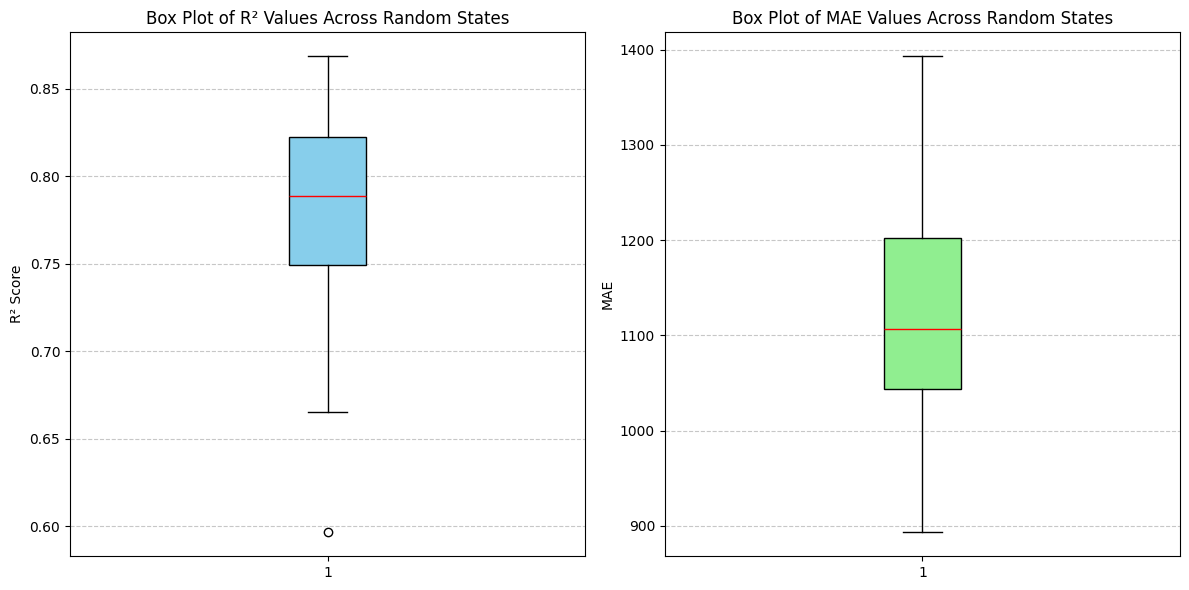

In [17]:
results = []

for i in range(1, 100):
    # Split the data into training and testing sets, using only the selected features
    X_train, X_test, y_train, y_test = train_test_split(X[SelectKBest], y, test_size=0.2, random_state=i)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results.append({'random_state': i, 'MAE': mae, 'MSE': mse, 'R2': r2})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)

# Create box plots for R² and MAE values
plt.figure(figsize=(12, 6))

# Box plot for R² values
plt.subplot(1, 2, 1)
plt.boxplot(results_df['R2'], patch_artist=True, boxprops=dict(facecolor="skyblue", color="black"),
            whiskerprops=dict(color="black"), capprops=dict(color="black"), medianprops=dict(color="red"))
plt.title('Box Plot of R² Values Across Random States')
plt.ylabel('R² Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Box plot for MAE values
plt.subplot(1, 2, 2)
plt.boxplot(results_df['MAE'], patch_artist=True, boxprops=dict(facecolor="lightgreen", color="black"),
            whiskerprops=dict(color="black"), capprops=dict(color="black"), medianprops=dict(color="red"))
plt.title('Box Plot of MAE Values Across Random States')
plt.ylabel('MAE')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plots
plt.tight_layout()
plt.show()


# Decision Tree


## Select k best

    random_state    MAE        MSE   R2
0              1 493.87 2055430.12 0.78
1              2 316.95  822914.58 0.88
2              3 648.46 4455789.16 0.74
3              4 704.42 4000110.44 0.75
4              5 689.93 2404219.94 0.82
..           ...    ...        ...  ...
95            96 651.82 1703708.86 0.85
96            97 306.26  776218.35 0.89
97            98 760.52 2755447.55 0.79
98            99 645.80 2819694.11 0.78
99           100 251.17  673629.41 0.95

[100 rows x 4 columns]


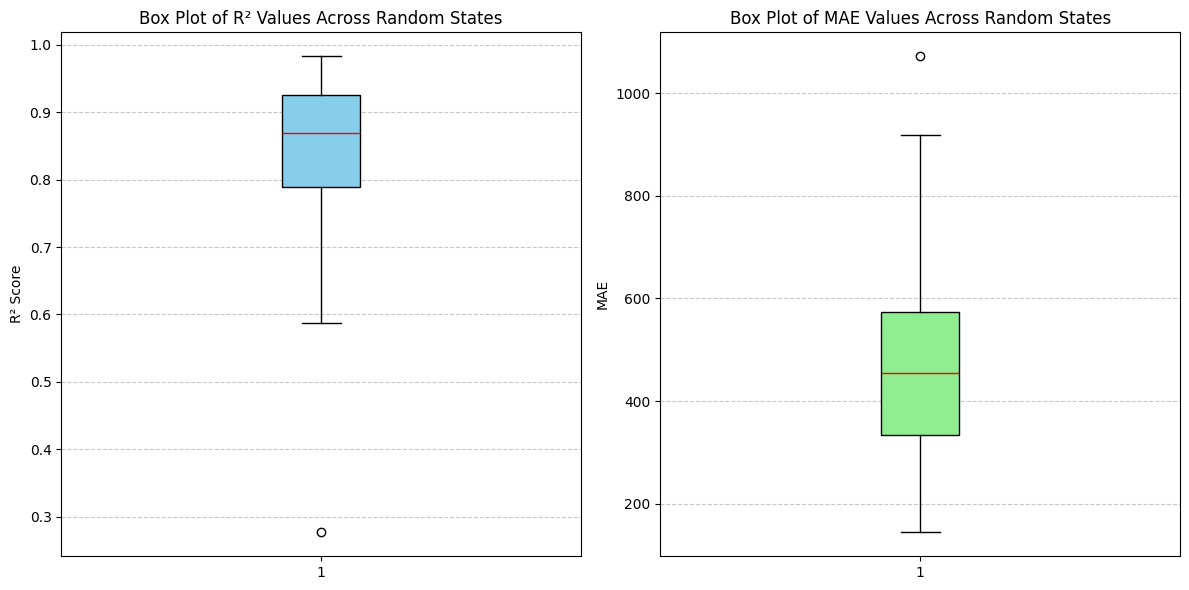

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Initialize results list
results = []

# Loop through random states
for random_state in range(1, 101):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X[SelectKBest], y, test_size=0.2, random_state=random_state)

    # Train the model
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results.append({'random_state': random_state, 'MAE': mae, 'MSE': mse, 'R2': r2})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)

# Create box plots for R² and MAE values
plt.figure(figsize=(12, 6))

# Box plot for R² values
plt.subplot(1, 2, 1)
plt.boxplot(results_df['R2'], patch_artist=True, boxprops=dict(facecolor="skyblue", color="black"),
            whiskerprops=dict(color="black"), capprops=dict(color="black"), medianprops=dict(color="red"))
plt.title('Box Plot of R² Values Across Random States')
plt.ylabel('R² Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Box plot for MAE values
plt.subplot(1, 2, 2)
plt.boxplot(results_df['MAE'], patch_artist=True, boxprops=dict(facecolor="lightgreen", color="black"),
            whiskerprops=dict(color="black"), capprops=dict(color="black"), medianprops=dict(color="red"))
plt.title('Box Plot of MAE Values Across Random States')
plt.ylabel('MAE')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plots
plt.tight_layout()
plt.show()


## RFE

    random_state    MAE        MSE   R2
0              1 397.04 1605964.37 0.83
1              2 217.98  468698.82 0.93
2              3 662.27 4176130.67 0.76
3              4 673.69 4225127.56 0.74
4              5 694.24 2400235.69 0.82
..           ...    ...        ...  ...
95            96 782.92 2135493.53 0.81
96            97 296.39  732470.53 0.90
97            98 723.78 2528210.58 0.80
98            99 586.87 1734256.17 0.86
99           100 316.92  835757.28 0.93

[100 rows x 4 columns]


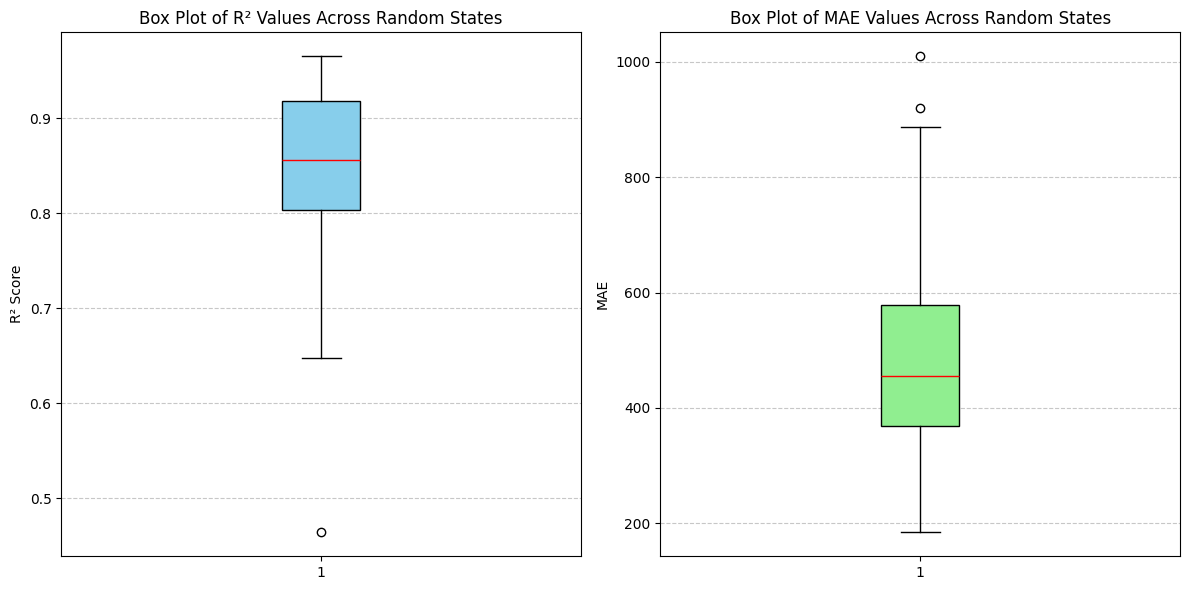

In [19]:

# Initialize results list
results = []

# Loop through random states
for random_state in range(1, 101):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features_RFE], y, test_size=0.2, random_state=random_state)

    # Train the model
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results.append({'random_state': random_state, 'MAE': mae, 'MSE': mse, 'R2': r2})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)

# Create box plots for R² and MAE values
plt.figure(figsize=(12, 6))

# Box plot for R² values
plt.subplot(1, 2, 1)
plt.boxplot(results_df['R2'], patch_artist=True, boxprops=dict(facecolor="skyblue", color="black"),
            whiskerprops=dict(color="black"), capprops=dict(color="black"), medianprops=dict(color="red"))
plt.title('Box Plot of R² Values Across Random States')
plt.ylabel('R² Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Box plot for MAE values
plt.subplot(1, 2, 2)
plt.boxplot(results_df['MAE'], patch_artist=True, boxprops=dict(facecolor="lightgreen", color="black"),
            whiskerprops=dict(color="black"), capprops=dict(color="black"), medianprops=dict(color="red"))
plt.title('Box Plot of MAE Values Across Random States')
plt.ylabel('MAE')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plots
plt.tight_layout()
plt.show()


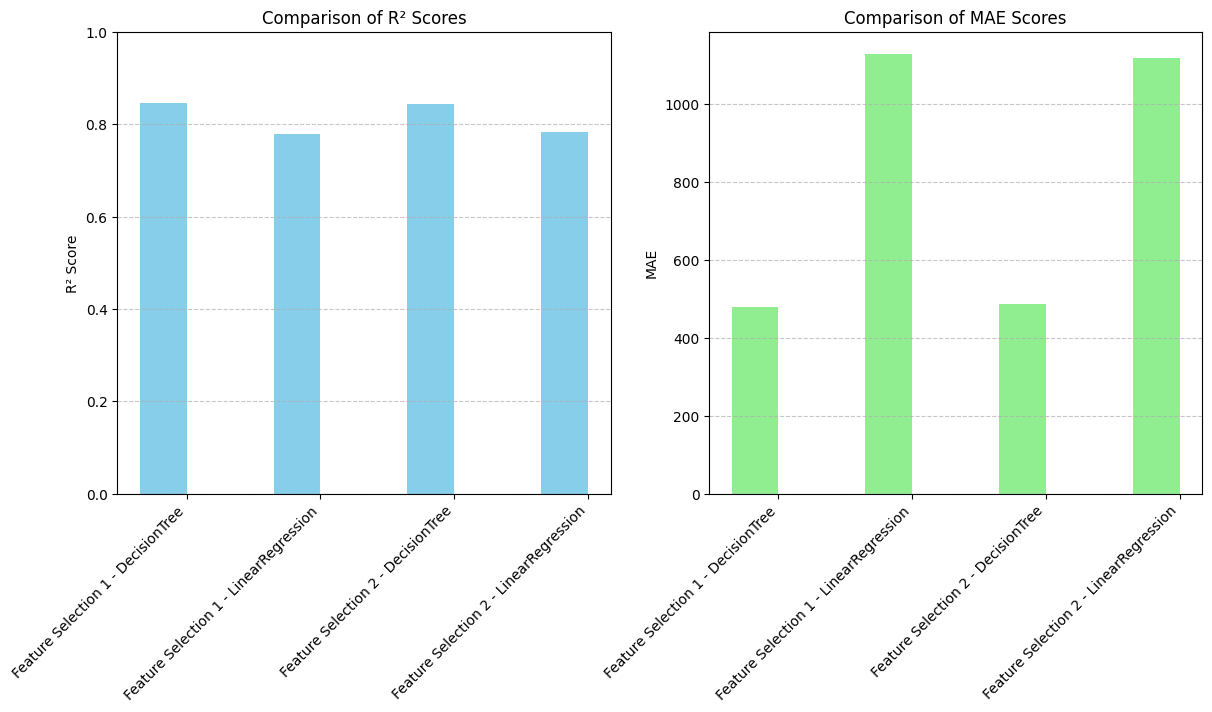

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Initialize results storage
results = {
    "Feature Selection 1 - DecisionTree": {"R2": [], "MAE": []},
    "Feature Selection 1 - LinearRegression": {"R2": [], "MAE": []},
    "Feature Selection 2 - DecisionTree": {"R2": [], "MAE": []},
    "Feature Selection 2 - LinearRegression": {"R2": [], "MAE": []},
}
# Define feature selection methods
feature_selection_RFE = X[selected_features_RFE]
feature_selection_SelectKBest = X[SelectKBest]

# Define models
models = {
    "DecisionTree": DecisionTreeRegressor(),
    "LinearRegression": LinearRegression()
}

# Loop through random states and calculate metrics for both feature selection methods and models
for random_state in range(1, 101):
    for feature_set_name, features in [("Feature Selection 1", feature_selection_RFE), 
                                       ("Feature Selection 2", feature_selection_SelectKBest)]:
        for model_name, model in models.items():
           
            X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=random_state)
            
            # Train the model
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Evaluate metrics
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)

            # Store results
            key = f"{feature_set_name} - {model_name}"
            results[key]["R2"].append(r2)
            results[key]["MAE"].append(mae)

# Calculate the average R2 and MAE for each model and feature selection
average_results = {key: {"R2": np.mean(metrics["R2"]), "MAE": np.mean(metrics["MAE"])} for key, metrics in results.items()}

# Extract data for plotting
models_and_features = list(average_results.keys())
r2_values = [average_results[key]["R2"] for key in models_and_features]
mae_values = [average_results[key]["MAE"] for key in models_and_features]

# Create bar charts for R² and MAE
x = np.arange(len(models_and_features))  # X-axis positions
width = 0.35  # Width of the bars

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(x - width / 2, r2_values, width, color='skyblue', label='R²')
plt.xticks(x, models_and_features, rotation=45, ha="right")
plt.title('Comparison of R² Scores')
plt.ylabel('R² Score')
plt.ylim(0, 1)  # Set a range for R²
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Bar chart for MAE
plt.subplot(1, 2, 2)
plt.bar(x - width / 2, mae_values, width, color='lightgreen', label='MAE')
plt.xticks(x, models_and_features, rotation=45, ha="right")
plt.title('Comparison of MAE Scores')
plt.ylabel('MAE')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# LSTM

In [21]:

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=56)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(63, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1) 
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=32)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 26167336.0000 - mae: 4131.4409 - val_loss: 41735272.0000 - val_mae: 5197.0786
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23537028.0000 - mae: 3878.0542 - val_loss: 41712848.0000 - val_mae: 5194.8501
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 25205360.0000 - mae: 3994.4607 - val_loss: 41651900.0000 - val_mae: 5188.8481
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23052776.0000 - mae: 3810.5356 - val_loss: 41491740.0000 - val_mae: 5173.1182
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 27051466.0000 - mae: 4159.7539 - val_loss: 41096112.0000 - val_mae: 5134.0815
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22458462.0000 - mae: 3789.4585 - val_loss: 40178800.0000 - val_mae: 5042.3550
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23607818.0000 - mae: 3764.0459 - val_loss: 38210852.0000 - val_mae: 4839.5049
Epoch 8/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [24]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on Test Data: {mae}")
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"R-squared Score on Test Data: {r2}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4305647.0000 - mae: 1014.5814
Mean Absolute Error on Test Data: 913.2628173828125
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
R-squared Score on Test Data: 0.7408819732084357
